# PREDATOR: **PRED**icting the imp**A**ct of cancer somatic mu**T**ations on pr**O**tein-protein inte**R**actions


## ESCA


<b><i class="fa fa-folder-o" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Location</b><br>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">C:\Users\ibrah\Documents\GitHub\Predicting-Mutation-Effects\src</code>
</p>

<b><i class="far fa-file" area-hidden="true" style="color:#1976D2"> </i>&nbsp; File Name</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">PredatorStudy_ESCA_soft.ipynb</code>
</p>

<b><i class="far fa-calendar-alt" area-hidden="true" style="color:#1976D2"> </i>&nbsp; Last Edited</b>
<p style="background:#F5F5F5; text-indent: 1em;">
<code style="background:#F5F5F5; color:#404040; font-weight:bold; font-size:12px">November 11th, 2021</code>
</p>


<div class="alert alert-block" style="background-color: #F5F5F5; border: 1px solid; padding: 10px; border-color: #E0E0E0">
    <b><i class="fa fa-compass" aria-hidden="true" style="color:#404040"></i></b>&nbsp; <b style="color: #404040">Purpose </b> <br>
<div>
   
- [x] Apply on Cancer Datasets
    > ESCA
    
**Dependent files:**

* Target (Cancer) data: 
    - *ESCA_Interface.txt*

In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import os.path as op
import sys
import random
from pathlib import Path

from pprint import pprint
from IPython.display import display
from tqdm.notebook import tqdm

from helpers.helpers_predator.displayers import (
    display_label_counts, 
    display_labels, 
    visualize_label_counts,
    display_data,
)

from helpers.helpers_predator.visualizers import (
    visualize_sampled_train_datasets_label_counts
)

from helpers.helpers_predator.common import load_predator
from helpers.helpers_predator.common import export_data

# PATHS
ESCA_PATH = Path(r"../../My-ELASPIC-Web-API/Elaspic_Results/Merged_Results/ESCA_Interface_2021-11-02.txt")
PREDATOR_MODEL_PATH = Path(r"PredatorModels/PredatorModel_2021-10-24/04f37897/predator.pkl")
PREDICTIONS_DATASETS_FOLDER_PATH = "../data/predictions_datasets/"

# Reflect changes in the modules immediately.
%load_ext autoreload
%autoreload 2

## Load the Predator

In [2]:
predator = load_predator(PREDATOR_MODEL_PATH)

2021-11-11 18:06:28 | INFO     | helpers.helpers_predator.common | Predator object PredatorModels\PredatorModel_2021-10-24\04f37897\predator.pkl is loaded successfully.


## Prediction TCGA on Cancer Dataset: ESCA

In [3]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('esca', ESCA_PATH)]
)

2021-11-11 18:06:28 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `esca` ..
2021-11-11 18:06:28 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_esca_data` ..
2021-11-11 18:06:28 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-11 18:06:28 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-11 18:06:28 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_esca data materials  ..


#### TCGA Cancer Datasets

##### ESCA

In [4]:
display_data(predator.data_materials["esca"])

Data dimensions: (2435, 103)


,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,Domain_clan,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P61088,P61088,E61K,done,interface,-,-,-,UQ_con,UQ_con,...,254.0,33.4527,33.4511,40.0177,40.0114,319.225,201.86,521.085,2.612,4.42118
1,P61088,P61088,E61K,done,interface,-,-,-,UQ_con,UQ_con,...,254.0,33.4527,33.4511,40.0177,40.0114,319.225,201.86,521.085,2.612,4.42118
2,P61088,P61088,E61K,done,interface,-,-,-,UQ_con,UQ_con,...,254.0,33.4527,33.4511,40.0177,40.0114,319.225,201.86,521.085,2.612,4.42118


#### Preprocessed TCGA Cancer Datasets

##### ESCA

In [5]:
display_data(predator.data_materials["target_esca_data"])

Data dimensions: (2435, 61)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Template_sequence_identity,Alignment_score,Interactor_template_sequence_identity,Interactor_alignment_score,Final_ddG,ProtBert_score,ProteinSolver_score,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,P61088,E61K,P38398,1.0,0.973684,0.3913,0.188348,0.828693,0.5699,0.06335,...,254.0,33.4527,33.4511,40.0177,40.0114,319.225,201.86,521.085,2.612,4.42118
1,P61088,E61K,P38398-3,1.0,0.973684,0.3913,0.188348,0.828693,0.5699,0.06335,...,254.0,33.4527,33.4511,40.0177,40.0114,319.225,201.86,521.085,2.612,4.42118
2,P61088,E61K,P38398-5,1.0,0.973684,0.3913,0.188348,0.828693,0.5699,0.06335,...,254.0,33.4527,33.4511,40.0177,40.0114,319.225,201.86,521.085,2.612,4.42118


### Voting mode: `soft`

In [6]:
predator.initialize_target_data_materials(
    tcga_code_path_pairs=[('esca', ESCA_PATH)]
)

2021-11-11 18:06:28 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `esca` ..
2021-11-11 18:06:28 | DEBUG    | helpers.helpers_predator.data_materials | Initialize `target_esca_data` ..
2021-11-11 18:06:28 | DEBUG    | helpers.helpers_predator.data_materials | Initializing target data materials ..
2021-11-11 18:06:28 | DEBUG    | helpers.helpers_predator.data_materials | Determined features: ['Provean_score', 'EL2_score', 'Final_ddG', 'Interactor_alignment_score', 'Solvent_accessibility_wt', 'Matrix_score', 'Solvent_accessibility_mut', 'van_der_waals_mut', 'Interactor_template_sequence_identity', 'solvation_polar_wt']
2021-11-11 18:06:28 | DEBUG    | helpers.helpers_predator.data_materials | Declaring Xs_esca data materials  ..


In [7]:
predator.predict(voting='soft')

2021-11-11 18:06:29 | DEBUG    | Predator | Predicting on cancer datasets ..
2021-11-11 18:06:29 | DEBUG    | helpers.helpers_predator.models | Initializing EnsambledVotingClassifier.
2021-11-11 18:06:29 | DEBUG    | helpers.helpers_predator.models | Voting mode: soft
2021-11-11 18:06:29 | DEBUG    | helpers.helpers_predator.predictions | Initializing: PredictionsSoft
2021-11-11 18:06:29 | DEBUG    | Predator | Predicting on esca cohort ..
2021-11-11 18:06:29 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=4,
                       max_features='sqrt', n_estimators=600,
                       random_state=14593)
2021-11-11 18:06:29 | DEBUG    | helpers.helpers_predator.models | X shape: (2435, 10)
2021-11-11 18:06:29 | DEBUG    | helpers.helpers_predator.models | Current estimator: RandomForestClassifier(bootstrap=False, max_depth=8, max_features=None,
                       min_samples_leaf=2,

In [8]:
predator.predictions.keys()

dict_keys(['esca_prob'])

In [9]:
# Predictions for first 10 experiment.
predator.predictions["esca_prob"][:3]

[array([[0.45337932, 0.54662068],
        [0.45337932, 0.54662068],
        [0.45337932, 0.54662068],
        ...,
        [0.22116647, 0.77883353],
        [0.04953503, 0.95046497],
        [0.20726783, 0.79273217]]),
 array([[1.        , 0.        ],
        [1.        , 0.        ],
        [1.        , 0.        ],
        ...,
        [0.68333333, 0.31666667],
        [0.        , 1.        ],
        [0.        , 1.        ]]),
 array([[0.38534041, 0.61465959],
        [0.38534041, 0.61465959],
        [0.38534041, 0.61465959],
        ...,
        [0.70400771, 0.29599229],
        [0.25235449, 0.74764551],
        [0.23916397, 0.76083603]])]

#### Predictions Post Processing

Post processing of predictions involves following steps:

##### 1. Merging Predictions with SNV Data

The prediction column is merged with SNV data for each experiment.

$\text{For each experiment } n: $

$$
  \textit{(Prediction Merged Data)}_n = \underbrace{[\textit{Predictions}_n]}_\text{Probs Percentages} + 
      \underbrace{[\textit{Protein }] [\textit{Mutation }] [\textit{Interactor }]}_\text{Cancer Data Triplets} + \underbrace{[\textit{Features }] }_\text{Elaspic}
$$


##### 2. Convert to 1-isomer: `Interactor_UniProt_ID`

$\textit{Interactor_UniProt_ID}$ column contains isomer proteins. Here, we convert them into primary isoform representation (i.e. without dashes).

| Interactor_UniProt_ID |
--------------
| P38936     |
| P16473     |
| P16473-2   |
| P19793     |

##### 3. Dropping Invalid Predictions

Entries whose predicted class-1 probability lies in both `Decreasing` and `Increasing+NoEff` are dropped.

Due to having different features for the same $\textit{(protein, mutation, interactor)}$ triplet from ELASPIC, the triplet $\textit{(protein, mutation, interactor)}$ may contain class-1 probability prediction of both lower than 0.50 and higher than 50. We drop such instances.

In [10]:
predator.predictions_post_process()

2021-11-11 18:06:32 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-11 18:06:32 | DEBUG    | helpers.helpers_predator.predictions | Post processing predictions for cohort esca ..
2021-11-11 18:06:32 | DEBUG    | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-11 18:06:32 | DEBUG    | helpers.helpers_predator.predictions | Merging predictions with esca cancer dataset ..
2021-11-11 18:06:33 | DEBUG    | helpers.helpers_predator.predictions | Handling valid and invalid entries ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-11 18:06:37 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 367): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.647123  P61088     E61K     O95628
1    0.468899  P61088     E61K     O95628
2    0.468899  P61088     E61K     O95628
3    0.327881  P61088     E61K     O95628
4    0.468899  P61088     E61K     O95628
2021-11-11 18:06:41 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 335): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0         1.0  P61088     E61K     Q96PU5
1         0.0  P61088     E61K     Q96PU5
2         0.0  P61088     E61K     Q96PU5
3         0.0  P61088     E61K     Q96PU5
4         0.0  P61088     E61K     Q96PU5
2021-11-11 18:06:45 | DEBUG    | helpers.helpers_predator.predictions_utils | Removed entries first five rows (of 307): 
   PREDICTION PROTEIN MUTATION INTERACTOR
0    0.722175  P61088     E61K     O95628
1    0.604506  P61088     E61K     O95628
2    0.

In [11]:
predator.predictions.keys()

dict_keys(['esca_prob', 'esca_predicted_probs_datasets', 'esca_predicted_valid_datasets', 'esca_predicted_invalid_datasets', 'esca_finalized_prediction_dataframes'])

In [12]:
display_data(predator.predictions["esca_predicted_probs_datasets"][0])

Data dimensions: (2435, 104)


,Prediction,Input_identifier,UniProt_ID,Mutation,Status,Type,COSMIC_mut_ID,ClinVar_mut_ID,UniProt_mut_ID,Domain_name,...,number_of_residues_mut,IntraclashesEnergy1_wt,IntraclashesEnergy1_mut,IntraclashesEnergy2_wt,IntraclashesEnergy2_mut,Interface_hydrophobic_area,Interface_hydrophilic_area,Interface_total_area,Interface_contact_distance_wt,Interface_contact_distance_mut
0,0.546621,P61088,P61088,E61K,done,interface,-,-,-,UQ_con,...,254.0,33.4527,33.4511,40.0177,40.0114,319.225,201.86,521.085,2.612,4.42118
1,0.546621,P61088,P61088,E61K,done,interface,-,-,-,UQ_con,...,254.0,33.4527,33.4511,40.0177,40.0114,319.225,201.86,521.085,2.612,4.42118
2,0.546621,P61088,P61088,E61K,done,interface,-,-,-,UQ_con,...,254.0,33.4527,33.4511,40.0177,40.0114,319.225,201.86,521.085,2.612,4.42118


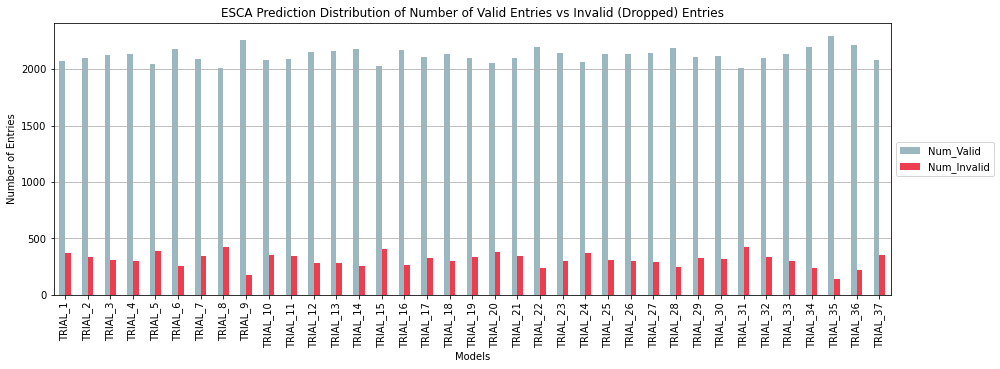

In [13]:
predator.predictions.plot_distribution_valid_vs_invalid("esca")

2021-11-11 18:09:22 | DEBUG    | helpers.helpers_predator.predictions | Plotting number of finalized predictions per model.
Note that following plot shows the number of (protein, mutation, interactor) triplets which had valid prediction.


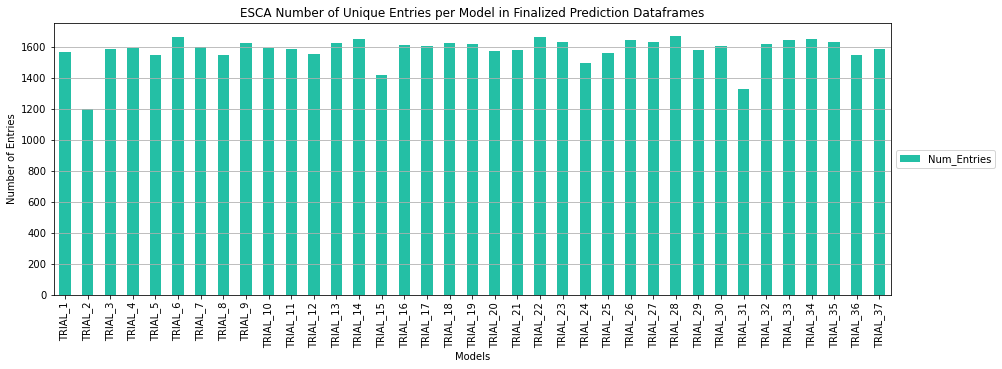

In [14]:
predator.predictions.plot_num_finalized_predictions("esca")

In [15]:
display_data(predator.predictions['esca_finalized_prediction_dataframes'][0])

Data dimensions: (1564, 4)


,Prediction,UniProt_ID,Mutation,Interactor_UniProt_ID
0,0.546621,P61088,E61K,P38398
1,0.846558,P61088,E61K,Q96PU5
2,0.650793,P61088,E61K,Q9Y4L5


In [16]:
predator.prepare_ensemble_prediction_data()

2021-11-11 18:09:23 | INFO     | helpers.helpers_predator.predictions | PredictionsSoft
2021-11-11 18:09:23 | INFO     | helpers.helpers_predator.predictions | Preparing ensemble prediction data for esca taking median ..


  0%|          | 0/37 [00:00<?, ?it/s]

2021-11-11 18:10:23 | DEBUG    | helpers.helpers_predator.predictions | Prediction probabilities data for esca is prepared.
Accessible from `esca_predictions_prob_data`.
2021-11-11 18:10:23 | DEBUG    | helpers.helpers_predator.predictions | Ensemble prediction data for esca is prepared.
Accessible from `esca_ensemble_prediction_data`.
2021-11-11 18:10:23 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data is available for esca.
Accessible from predictions.['esca_prediction_results']
2021-11-11 18:10:23 | DEBUG    | helpers.helpers_predator.predictions | Resulting prediction data (no_votes dropped) is available for esca.
Accessible from predictions.['esca_prediction_results_no_votes_dropped']


In [17]:
display_data(predator.predictions['esca_predictions_prob_data'])

Data dimensions: (1230, 39)


,Trial 0,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,...,Trial 29,Trial 30,Trial 31,Trial 32,Trial 33,Trial 34,Trial 35,Trial 36,PROB_1s_AVG,VOTED_PREDICTION
0,0.546621,0.0,0.61466,0.624847,0.362138,0.616465,0.564535,0.626396,0.288355,0.591122,...,0.253704,0.6,0.591546,0.58991,0.579181,0.607555,0.565171,0.579581,0.57282,1
1,NO_VOTE,0.0,NO_VOTE,NO_VOTE,0.407895,NO_VOTE,NO_VOTE,NO_VOTE,0.346963,NO_VOTE,...,NO_VOTE,NO_VOTE,NO_VOTE,NO_VOTE,NO_VOTE,0.633825,NO_VOTE,NO_VOTE,NO_VOTE,NO_VOTE
2,0.802948,NO_VOTE,0.763824,0.706461,NO_VOTE,0.70035,0.571998,0.72687,0.525851,0.581051,...,0.652753,0.8,0.739628,0.594535,0.643593,0.723161,0.67045,0.667854,0.68296,1


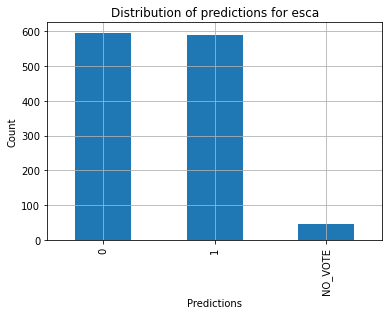

In [18]:
predator.predictions.plot_ensemble_prediction_distribution("esca")

In [19]:
esca_prediction_results_soft = predator.predictions['esca_prediction_results']
display_data(esca_prediction_results_soft)

Data dimensions: (1230, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P61088,E61K,P38398,1
1,P61088,E61K,O95628,NO_VOTE
2,P61088,E61K,Q96PU5,1


In [20]:
esca_prediction_results_soft_no_votes_dropped = predator.predictions["esca_prediction_results_no_votes_dropped"]
display_data(esca_prediction_results_soft_no_votes_dropped)

Data dimensions: (1185, 4)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction
0,P61088,E61K,P38398,1
2,P61088,E61K,Q96PU5,1
3,P61088,E61K,Q9Y4L5,1


Label counts:
Disrupting                596
Increasing + No Effect    589
Name: Prediction, dtype: int64


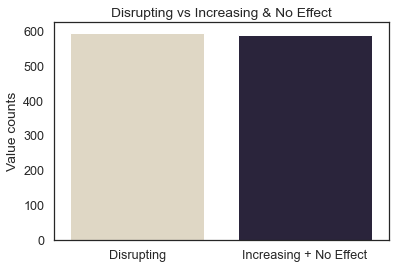

In [21]:
visualize_label_counts(esca_prediction_results_soft_no_votes_dropped, 'Prediction')

In [22]:
esca_ensemble_prediction_data_soft = predator.predictions["esca_ensemble_prediction_data"]

In [23]:
esca_predictions_prob_data_soft = predator.predictions["esca_predictions_prob_data"]

In [24]:
def add_median_probabilities(prediction_results, predictions_prob_data):
    assert len(prediction_results) == len(predictions_prob_data)
    prediction_results_with_probabilities = prediction_results.copy()
    prediction_results_with_probabilities["Median_Probability"] = predictions_prob_data["PROB_1s_AVG"]
    return prediction_results_with_probabilities

In [25]:
esca_prediction_results_soft_with_median_probs = add_median_probabilities(
    prediction_results=predator.predictions["esca_prediction_results"],
    predictions_prob_data=predator.predictions["esca_predictions_prob_data"]
)
esca_prediction_results_soft_with_median_probs.head()

,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P61088,E61K,P38398,1,0.57282
1,P61088,E61K,O95628,NO_VOTE,NO_VOTE
2,P61088,E61K,Q96PU5,1,0.68296
3,P61088,E61K,Q9Y4L5,1,0.62781
4,P61088,E61K,Q9Y3C5,1,0.60244


In [26]:
esca_prediction_results_soft_no_votes_dropped_with_median_probabilities = esca_prediction_results_soft_with_median_probs[
    esca_prediction_results_soft_with_median_probs['Prediction'].isin([0, 1])
]

In [27]:
len(esca_prediction_results_soft_no_votes_dropped_with_median_probabilities)

1185

## Exporting Predictions

In [28]:
# esca_prediction_results = esca_prediction_results_hard_no_votes_dropped
# esca_prediction_results = esca_prediction_results_soft_no_votes_dropped
esca_prediction_results = esca_prediction_results_soft_no_votes_dropped_with_median_probabilities
display_data(esca_prediction_results)

Data dimensions: (1185, 5)


,UniProt_ID,Mutation,Interactor_UniProt_ID,Prediction,Median_Probability
0,P61088,E61K,P38398,1,0.57282
2,P61088,E61K,Q96PU5,1,0.68296
3,P61088,E61K,Q9Y4L5,1,0.62781


In [29]:
predator.export_prediction(
    tcga="esca",
    data=esca_prediction_results,
    file_name="predictions",
    folder_path=PREDICTIONS_DATASETS_FOLDER_PATH,
    voting="soft",
    overwrite=False,
    file_extension='csv'
)

2021-11-11 18:10:25 | DEBUG    | helpers.helpers_predator.common | Folder with ID 8258aafe is created.
2021-11-11 18:10:25 | DEBUG    | helpers.helpers_predator.common | Exporting data predictions at location ../data/predictions_datasets/ in folder esca_prediction_2021-11-11\8258aafe..
2021-11-11 18:10:25 | INFO     | helpers.helpers_predator.common | ../data/predictions_datasets/esca_prediction_2021-11-11\8258aafe\predictions_soft_2021-11-11.csv is exported successfully.
2021-11-11 18:10:25 | INFO     | helpers.helpers_predator.common | Config is exported.


---